# **Code to Control Hexdrive**

Equation:

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
C_1
\begin{bmatrix}
-\frac{\sqrt{3}}{2} \\
\frac{1}{2}
\end{bmatrix}
+
C_2
\begin{bmatrix}
-\frac{\sqrt{3}}{2} \\
-\frac{1}{2}
\end{bmatrix}
+
C_3
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
$$

Visuals:

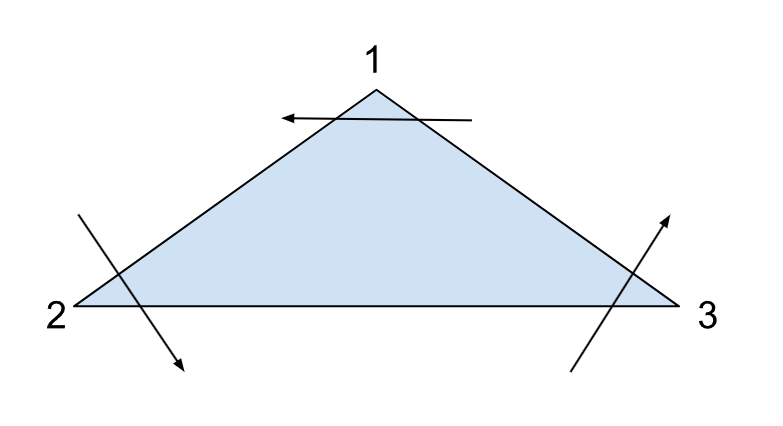

In [ ]:
## Alan Connor's Code (adapted slightly) ##
## Two Functions to find power and direction for each motor ##

import numpy as np

#vector projection function
def proj_of_u_on_v(u,v):
  v_norm = np.sqrt(sum(v**2))
  proj = (np.dot(u, v)/v_norm**2)*v
  return(proj)


#Function to calculate the power for each motor
def calcPower(Desired_Direction):

  wheels_orientation = np.array([[-1, 0],
                                 [0.5, -np.sqrt(3)/2],
                                 [0.5,np.sqrt(3)/2]])



  wheel_power_vectors = np.zeros((3, 2))

  for i in range(3):
    v = np.array([wheels_orientation[i][0],wheels_orientation[i][1]])
    proj = proj_of_u_on_v(Desired_Direction,v)
    wheel_power_vectors[i][0] = proj[0]/3
    wheel_power_vectors[i][1] = proj[1]/3


  wheel_power = np.zeros((3,1))

  for i in range(3):
    if wheels_orientation[i][0] != 0:
      wheel_power[i] = wheel_power_vectors[i][0]/wheels_orientation[i][0]
    else:
      wheel_power[i] = wheel_power_vectors[i][1]/wheels_orientation[i][1]


  return(2*wheel_power)


#Function to find whether the motor direction should be flipped
def motorDirection(powerVecotrs):
  reverseMotor = [False,False,False]
  for i in range(len(reverseMotor)):
    if powerVecotrs[i] < 0:
      reverseMotor[i] = True
  return reverseMotor


def main():
  #example desired direction
  input = np.array([0,1])

  print(calcPower(input))
  print(motorDirection(calcPower(input)))

if __name__ == '__main__':
  while True:
    main()